In [27]:
import os

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import copy

import time

import torch.optim as optim
#from dataset import train_dataloader, val_dataloader
#from dataset import train_dataset, val_dataset
from tqdm import tqdm

from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np

from sklearn.model_selection import cross_val_score

import pickle
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [2]:
main_dir = os.path.abspath('..') # os.path.join(os.getcwd())
data_dir = os.path.join(main_dir, "Data")
shapefiles_dir = os.path.join(main_dir, data_dir, "shapefiles")

In [3]:
# Main files:
# precovid_crime_micro_geo_11_29_2021
# covid_crime_micro_geo_11_29_2021

pre_covid_data = pd.read_csv(os.path.join(data_dir, "Merged", "precovid_crime_micro_geo_11_29_2021.csv"), index_col=False)
covid_data = pd.read_csv(os.path.join(data_dir, "Merged", "covid_crime_micro_geo_11_29_2021.csv"), index_col=False)

del pre_covid_data["SHIFT"]
del pre_covid_data["OFFENSE"]
del pre_covid_data['LATITUDE']
del pre_covid_data['LONGITUDE']
del pre_covid_data["ward_1"]
del pre_covid_data["ward_2"]
del pre_covid_data["ward_3"]
del pre_covid_data["ward_4"]
del pre_covid_data["ward_5"]
del pre_covid_data["ward_6"]
del pre_covid_data["ward_7"]
del pre_covid_data["ward_8"]
del pre_covid_data[covid_data.columns[0]]
# del pre_covid_data['date']

del covid_data["SHIFT"]
del covid_data["OFFENSE"]
del covid_data['LATITUDE']
del covid_data['LONGITUDE']
del covid_data["ward_1"]
del covid_data["ward_2"]
del covid_data["ward_3"]
del covid_data["ward_4"]
del covid_data["ward_5"]
del covid_data["ward_6"]
del covid_data["ward_7"]
del covid_data["ward_8"]
del covid_data[covid_data.columns[0]]
# del covid_data['date']

pre_covid_data['WARD'] = pre_covid_data['WARD'].astype(int)
covid_data['WARD'] = covid_data['WARD'].astype(int)

In [4]:
pre_covid_data

,WARD,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,5,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,6,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,6,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,6,2017-10-27,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,5,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104354,6,2020-03-01,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.138408,0.513213,0.030329
104355,5,2009-12-01,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.039210,0.809993,0.124818
104356,8,2019-02-18,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.559830,0.569863,0.005769
104357,5,2004-02-02,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.252021,0.904808,0.062211


In [5]:
covid_data

,WARD,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,6,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.189878,0.352657,0.081604
1,8,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.585539,1.073603,0.156339
2,4,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.490429,0.876416,0.009941
3,6,2020-08-31,14049.0,57.0,0.0,87.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.229824,0.360878,0.051530
4,2,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.063730,0.035825,0.076037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,5,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.418831,0.078911,0.159204
43160,7,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.718883,0.790578,0.034208
43161,5,2021-02-03,37365.0,166.0,6.0,106.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.345018,0.900916,0.097899
43162,8,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.442868,0.972997,0.004663


In [6]:
# Baseline:
x_PRE_COVID_baseline_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_baseline_not_scaled["total_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_death"]
del x_PRE_COVID_baseline_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_baseline_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Experiment:
x_PRE_COVID_experiment_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_experiment_not_scaled["total_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_death"]
del x_PRE_COVID_experiment_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_experiment_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Labels:
y_PRE_COVID_base = pre_covid_data['WARD']
y_COVID_base = covid_data['WARD']

y_PRE_COVID_experiment = covid_data['WARD']
y_COVID_experiment = pre_covid_data['WARD']

In [7]:
x_PRE_COVID_baseline_not_scaled

,date,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,2017-10-27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104354,2020-03-01,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.138408,0.513213,0.030329
104355,2009-12-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.039210,0.809993,0.124818
104356,2019-02-18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.559830,0.569863,0.005769
104357,2004-02-02,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.252021,0.904808,0.062211


In [8]:
x_COVID_baseline_not_scaled

,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.189878,0.352657,0.081604
1,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.585539,1.073603,0.156339
2,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.490429,0.876416,0.009941
3,2020-08-31,14049.0,57.0,0.0,87.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.229824,0.360878,0.051530
4,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.063730,0.035825,0.076037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.418831,0.078911,0.159204
43160,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.718883,0.790578,0.034208
43161,2021-02-03,37365.0,166.0,6.0,106.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.345018,0.900916,0.097899
43162,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.442868,0.972997,0.004663


In [9]:
x_PRE_COVID_experiment_not_scaled

,date,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.189878,0.352657,0.081604
1,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.585539,1.073603,0.156339
2,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.490429,0.876416,0.009941
3,2020-08-31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.229824,0.360878,0.051530
4,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.063730,0.035825,0.076037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,2021-02-04,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.418831,0.078911,0.159204
43160,2021-02-04,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.718883,0.790578,0.034208
43161,2021-02-03,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.345018,0.900916,0.097899
43162,2021-02-04,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.442868,0.972997,0.004663


In [10]:
x_COVID_experiment_not_scaled

,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,2017-10-27,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104354,2020-03-01,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.138408,0.513213,0.030329
104355,2009-12-01,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.039210,0.809993,0.124818
104356,2019-02-18,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.559830,0.569863,0.005769
104357,2004-02-02,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.252021,0.904808,0.062211


In [11]:
del x_PRE_COVID_baseline_not_scaled['date']
del x_COVID_baseline_not_scaled['date']
del x_PRE_COVID_experiment_not_scaled['date']
del x_COVID_experiment_not_scaled['date']

In [12]:
'''
# X Data:
x_PRE_COVID_baseline_not_scaled 
x_COVID_baseline_not_scaled 

x_PRE_COVID_experiment_not_scaled 
x_COVID_experiment_not_scaled

# Label Data
y_PRE_COVID_base
y_COVID_base

y_PRE_COVID_experiment
y_COVID_experiment
'''
print("")

In [13]:
# get original data
random_state = [1, 10, 25, 40, 50]

###################
cross_val_score_lst_PRE_COVID_MODEL_base = []
pr_lst_PRE_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold
cm_lst_PRE_COVID_MODEL_base = []

cross_val_score_lst_COVID_MODEL_base = []
pr_lst_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold
cm_lst_COVID_MODEL_base = []

###################
cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment = []
pr_lst_PRE_COVID_MODEL_ON_COVID_experiment = []
cm_lst_PRE_COVID_MODEL_ON_COVID_experiment = []

cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment = []
pr_lst_COVID_MODEL_ON_PRE_COVID_experiment = []
cm_lst_COVID_MODEL_ON_PRE_COVID_experiment = []

# multilabel_confusion_matrix

###################
# go through validation splits
model_name = "SVC_CV_"

for val in range(0, 5):
    
    state_idx = val
    ############################
    #### GET Nth VALIDATION ####
    ############################
    # get Nth validation
    # Baseline:
    curr_X_train_PRE_COVID_unscaled_base, curr_X_test_PRE_COVID_unscaled_base, curr_y_train_PRE_COVID_base, curr_y_test_PRE_COVID_base = train_test_split(x_PRE_COVID_baseline_not_scaled, 
                                                                                                                                                          y_PRE_COVID_base,
                                                                                                                                                          test_size=0.3,
                                                                                                                                                          shuffle=True,
                                                                                                                                                          random_state=random_state[state_idx])
    
    curr_X_train_COVID_unscaled_base, curr_X_test_COVID_unscaled_base, curr_y_train_COVID_base, curr_y_test_COVID_base = train_test_split(x_COVID_baseline_not_scaled,
                                                                                                                                          y_COVID_base, 
                                                                                                                                          test_size=0.3, 
                                                                                                                                          shuffle=True,
                                                                                                                                          random_state=random_state[state_idx])
    # Experiment
    curr_X_train_PRE_COVID_unscaled_experiment, curr_X_test_PRE_COVID_unscaled_experiment, curr_y_train_PRE_COVID_experiment, curr_y_test_PRE_COVID_experiment = train_test_split(x_PRE_COVID_experiment_not_scaled,
                                                                                                                                                                                  y_PRE_COVID_experiment,
                                                                                                                                                                                  test_size=0.3, 
                                                                                                                                                                                  shuffle=True,
                                                                                                                                                                                  random_state=random_state[state_idx])
    
    curr_X_train_COVID_unscaled_experiment, curr_X_test_COVID_unscaled_experiment, curr_y_train_COVID_experiment, curr_y_test_COVID_experiment = train_test_split(x_COVID_experiment_not_scaled, 
                                                                                                                                                                  y_COVID_experiment, 
                                                                                                                                                                  test_size=0.3, 
                                                                                                                                                                  shuffle=True,
                                                                                                                                                                  random_state=random_state[state_idx])
    print("\nDataset shapes:")
    print("  X_train_PRE_COVID_Baseline:", curr_X_train_PRE_COVID_unscaled_base.shape)
    print("  X_train_PRE_COVID_Experiment:", curr_X_train_PRE_COVID_unscaled_experiment.shape)
    print("")
    print("  X_train_COVID_Baseline:", curr_X_train_COVID_unscaled_base.shape)
    print("  X_train_COVID_Experiment:", curr_X_train_COVID_unscaled_experiment.shape)
    
    # Setup scaler and train on according baseline trains
    MinMax_scaler_PRE_COVID = MinMaxScaler(feature_range=(0, 1))
    MinMax_scaler_PRE_COVID = MinMax_scaler_PRE_COVID.fit(curr_X_train_PRE_COVID_unscaled_base) # Baseline Pre-COVID Train

    MinMax_scaler_COVID = MinMaxScaler(feature_range=(0, 1))
    MinMax_scaler_COVID = MinMax_scaler_COVID.fit(curr_X_train_COVID_unscaled_base) # Baseline COVID Train
    
    ####################
    #### SCALE DATA ####
    ####################
    # Scale the data (Base one, and experiment one)
    # For PRE_COVID:
    curr_x_train_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_train_PRE_COVID_unscaled_base) # For training Pre-COVID model
    curr_x_test_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_base) # For testing Pre-COVID model (base)
    curr_x_test_PRE_COVID_on_COVID_experiment = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_experiment) # For testing Pre-COVID on COVID (experiment)

    # For COVID:
    curr_x_train_COVID_base = MinMax_scaler_COVID.transform(curr_X_train_COVID_unscaled_base) # For training COVID model
    curr_x_test_COVID_base = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_base) # For testing COVID model (base)
    curr_x_test_COVID_on_PRE_COVID_experiment = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_experiment) # For testing COVID on Pre-COVID (experiment)
    
    #########################
    #### PRE-COVID MODEL ####
    #########################
    curr_model_PRE_COVID = SVC(C=41, kernel='rbf') # SET YOUR MODEL HERE WITH ALL SELECTED HYPERPARAMETERS AND OTHER SETTINGS
    curr_model_PRE_COVID.fit(curr_x_train_PRE_COVID_base, curr_y_train_PRE_COVID_base)
    pickle.dump(curr_model_PRE_COVID, open(f"PRE_COVID_model_name_{val}.sav", 'wb'))
    # Get Pre-COVID Baseline:
    curr_accuracy_PRE_COVID_base = accuracy_score(curr_y_test_PRE_COVID_base, 
                                                  curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base))
    curr_precision_PRE_COVID_base = precision_score(curr_y_test_PRE_COVID_base, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                    average='macro') 
    curr_recall_PRE_COVID_base = recall_score(curr_y_test_PRE_COVID_base, 
                                              curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                              average='macro')
    
    cross_val_score_lst_PRE_COVID_MODEL_base.append(curr_accuracy_PRE_COVID_base)
    pr_lst_PRE_COVID_MODEL_base.append([curr_precision_PRE_COVID_base, curr_recall_PRE_COVID_base])
    cm_lst_PRE_COVID_MODEL_base.append(multilabel_confusion_matrix(curr_y_test_PRE_COVID_base,
                                                                   curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base)))
    
    
    # Get Pre-COVID Experiment:
    curr_accuracy_PRE_COVID_experiment = accuracy_score(curr_y_test_PRE_COVID_experiment, 
                                                        curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment))
    curr_precision_PRE_COVID_experiment = precision_score(curr_y_test_PRE_COVID_experiment, 
                                                          curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                          average='macro') 
    curr_recall_PRE_COVID_experiment = recall_score(curr_y_test_PRE_COVID_experiment, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                    average='macro')
    
    cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment.append(curr_accuracy_PRE_COVID_experiment)
    pr_lst_PRE_COVID_MODEL_ON_COVID_experiment.append([curr_precision_PRE_COVID_experiment, curr_recall_PRE_COVID_experiment])
    cm_lst_PRE_COVID_MODEL_ON_COVID_experiment.append(multilabel_confusion_matrix(curr_y_test_PRE_COVID_experiment,
                                                               curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment)))
    
    
    #####################
    #### COVID MODEL ####
    #####################
    curr_model_COVID = SVC(C=41, kernel='rbf') # SET YOUR MODEL HERE WITH ALL SELECTED HYPERPARAMETERS AND OTHER SETTINGS
    curr_model_COVID.fit(curr_x_train_COVID_base, curr_y_train_COVID_base)
    pickle.dump(curr_model_COVID, open(f"COVID_model_name_{val}.sav", 'wb'))
    # Get COVID Baseline:
    curr_accuracy_COVID_base = accuracy_score(curr_y_test_COVID_base, 
                                              curr_model_COVID.predict(curr_x_test_COVID_base))
    curr_precision_COVID_base = precision_score(curr_y_test_COVID_base, 
                                                curr_model_COVID.predict(curr_x_test_COVID_base),
                                                average='macro') 
    curr_recall_COVID_base = recall_score(curr_y_test_COVID_base, 
                                          curr_model_COVID.predict(curr_x_test_COVID_base),
                                          average='macro')
    
    cross_val_score_lst_COVID_MODEL_base.append(curr_accuracy_COVID_base)
    pr_lst_COVID_MODEL_base.append([curr_precision_COVID_base, curr_recall_COVID_base])
    cm_lst_COVID_MODEL_base.append(multilabel_confusion_matrix(curr_y_test_COVID_base,
                                                               curr_model_COVID.predict(curr_x_test_COVID_base)))
    
    
    # Get COVID Experiment:
    curr_accuracy_COVID_experiment = accuracy_score(curr_y_test_COVID_experiment, 
                                                    curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment))
    curr_precision_COVID_experiment = precision_score(curr_y_test_COVID_experiment, 
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                      average='macro') 
    curr_recall_COVID_experiment = recall_score(curr_y_test_COVID_experiment, 
                                                curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                average='macro')
    
    cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment.append(curr_accuracy_COVID_experiment)
    pr_lst_COVID_MODEL_ON_PRE_COVID_experiment.append([curr_precision_COVID_experiment, curr_recall_COVID_experiment])
    cm_lst_COVID_MODEL_ON_PRE_COVID_experiment.append(multilabel_confusion_matrix(curr_y_test_COVID_experiment,
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment)))


Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)


In [14]:
print("PRE-COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base)

PRE-COVID Model Baseline:
Accuracy scores from each fold: [0.46227801200970997, 0.4688897406413696, 0.4702631915165453, 0.46799540053660404, 0.46789957838252205]
Precision and Recall from each fold: [[0.4600811913799536, 0.42176124121828024], [0.46684113263673577, 0.4265247383457995], [0.4664204837734109, 0.4278619067950967], [0.4611016227967444, 0.42343619261026777], [0.4616127562270751, 0.425496443931815]]


In [15]:
print("COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_base)

COVID Model Baseline:
Accuracy scores from each fold: [0.4365250965250965, 0.4327413127413127, 0.43644787644787647, 0.43853281853281856, 0.44193050193050193]
Precision and Recall from each fold: [[0.4193015670508638, 0.39963502985168853], [0.4127082626105499, 0.39606447552368057], [0.42123364227372706, 0.403593739918649], [0.42454616269292833, 0.40431189268939327], [0.4183937054223431, 0.40364497580448083]]


In [16]:
print("PRE-COVID Model Experiment (on COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment)

PRE-COVID Model Experiment (on COVID Data):
Accuracy scores from each fold: [0.44007722007722005, 0.4416988416988417, 0.4338996138996139, 0.4434749034749035, 0.4491891891891892]
Precision and Recall from each fold: [[0.43654384849467837, 0.40117210916580337], [0.4282334887236212, 0.39926204364316226], [0.4290577697764332, 0.395231990273601], [0.43189612372257347, 0.4032037667611386], [0.4338726844421079, 0.4082946589481879]]


In [17]:
print("COVID Model Experiment (on Pre-COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment)

COVID Model Experiment (on Pre-COVID Data):
Accuracy scores from each fold: [0.4104382266513351, 0.4137281206081513, 0.4187747540564712, 0.4155168008176824, 0.4204037306758656]
Precision and Recall from each fold: [[0.3974953429679458, 0.3791391204998384], [0.3983105772508634, 0.37941919009337055], [0.4038434603327168, 0.3863698924603277], [0.39911304519377677, 0.3826678561457243], [0.40304380260667794, 0.38447997055442684]]


-------------------------------------------------------------------------------------------

In [21]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [28]:
# get original data
random_state = [1, 10, 25, 40, 50]

###################
cross_val_score_lst_PRE_COVID_MODEL_base = []
pr_lst_PRE_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold
cm_lst_PRE_COVID_MODEL_base = []

cross_val_score_lst_COVID_MODEL_base = []
pr_lst_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold
cm_lst_COVID_MODEL_base = []

###################
cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment = []
pr_lst_PRE_COVID_MODEL_ON_COVID_experiment = []
cm_lst_PRE_COVID_MODEL_ON_COVID_experiment = []

cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment = []
pr_lst_COVID_MODEL_ON_PRE_COVID_experiment = []
cm_lst_COVID_MODEL_ON_PRE_COVID_experiment = []

# multilabel_confusion_matrix

###################
# go through validation splits
model_name = "SVC_CV_"

for val in range(0, 5):
    
    state_idx = val
    ############################
    #### GET Nth VALIDATION ####
    ############################
    # get Nth validation
    # Baseline:
    curr_X_train_PRE_COVID_unscaled_base, curr_X_test_PRE_COVID_unscaled_base, curr_y_train_PRE_COVID_base, curr_y_test_PRE_COVID_base = train_test_split(x_PRE_COVID_baseline_not_scaled, 
                                                                                                                                                          y_PRE_COVID_base,
                                                                                                                                                          test_size=0.3,
                                                                                                                                                          shuffle=True,
                                                                                                                                                          random_state=random_state[state_idx])
    
    curr_X_train_COVID_unscaled_base, curr_X_test_COVID_unscaled_base, curr_y_train_COVID_base, curr_y_test_COVID_base = train_test_split(x_COVID_baseline_not_scaled,
                                                                                                                                          y_COVID_base, 
                                                                                                                                          test_size=0.3, 
                                                                                                                                          shuffle=True,
                                                                                                                                          random_state=random_state[state_idx])
    # Experiment
    curr_X_train_PRE_COVID_unscaled_experiment, curr_X_test_PRE_COVID_unscaled_experiment, curr_y_train_PRE_COVID_experiment, curr_y_test_PRE_COVID_experiment = train_test_split(x_PRE_COVID_experiment_not_scaled,
                                                                                                                                                                                  y_PRE_COVID_experiment,
                                                                                                                                                                                  test_size=0.3, 
                                                                                                                                                                                  shuffle=True,
                                                                                                                                                                                  random_state=random_state[state_idx])
    
    curr_X_train_COVID_unscaled_experiment, curr_X_test_COVID_unscaled_experiment, curr_y_train_COVID_experiment, curr_y_test_COVID_experiment = train_test_split(x_COVID_experiment_not_scaled, 
                                                                                                                                                                  y_COVID_experiment, 
                                                                                                                                                                  test_size=0.3, 
                                                                                                                                                                  shuffle=True,
                                                                                                                                                                  random_state=random_state[state_idx])
    print("\nDataset shapes:")
    print("  X_train_PRE_COVID_Baseline:", curr_X_train_PRE_COVID_unscaled_base.shape)
    print("  X_train_PRE_COVID_Experiment:", curr_X_train_PRE_COVID_unscaled_experiment.shape)
    print("")
    print("  X_train_COVID_Baseline:", curr_X_train_COVID_unscaled_base.shape)
    print("  X_train_COVID_Experiment:", curr_X_train_COVID_unscaled_experiment.shape)
    
    # Setup scaler and train on according baseline trains
    MinMax_scaler_PRE_COVID = MinMaxScaler(feature_range=(0, 1))
    MinMax_scaler_PRE_COVID = MinMax_scaler_PRE_COVID.fit(curr_X_train_PRE_COVID_unscaled_base) # Baseline Pre-COVID Train

    MinMax_scaler_COVID = MinMaxScaler(feature_range=(0, 1))
    MinMax_scaler_COVID = MinMax_scaler_COVID.fit(curr_X_train_COVID_unscaled_base) # Baseline COVID Train
    
    ####################
    #### SCALE DATA ####
    ####################
    # Scale the data (Base one, and experiment one)
    # For PRE_COVID:
    curr_x_train_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_train_PRE_COVID_unscaled_base) # For training Pre-COVID model
    curr_x_test_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_base) # For testing Pre-COVID model (base)
    curr_x_test_PRE_COVID_on_COVID_experiment = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_experiment) # For testing Pre-COVID on COVID (experiment)

    # For COVID:
    curr_x_train_COVID_base = MinMax_scaler_COVID.transform(curr_X_train_COVID_unscaled_base) # For training COVID model
    curr_x_test_COVID_base = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_base) # For testing COVID model (base)
    curr_x_test_COVID_on_PRE_COVID_experiment = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_experiment) # For testing COVID on Pre-COVID (experiment)
    
    #########################
    #### PRE-COVID MODEL ####
    #########################
    #curr_model_PRE_COVID = SVC(C=41, kernel='rbf') # SET YOUR MODEL HERE WITH ALL SELECTED HYPERPARAMETERS AND OTHER SETTINGS
    #curr_model_PRE_COVID.fit(curr_x_train_PRE_COVID_base, curr_y_train_PRE_COVID_base)
    curr_model_PRE_COVID = pickle.load(open(f"PRE_COVID_model_name_{val}.sav", 'rb'))
    #pickle.dump(curr_model_PRE_COVID, open(f"PRE_COVID_model_name_{val}.sav", 'wb'))
    # Get Pre-COVID Baseline:
    curr_accuracy_PRE_COVID_base = accuracy_score(curr_y_test_PRE_COVID_base, 
                                                  curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base))
    curr_precision_PRE_COVID_base = precision_score(curr_y_test_PRE_COVID_base, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                    average='macro') 
    curr_recall_PRE_COVID_base = recall_score(curr_y_test_PRE_COVID_base, 
                                              curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                              average='macro')
    
    cross_val_score_lst_PRE_COVID_MODEL_base.append(curr_accuracy_PRE_COVID_base)
    pr_lst_PRE_COVID_MODEL_base.append([curr_precision_PRE_COVID_base, curr_recall_PRE_COVID_base])
    cm_lst_PRE_COVID_MODEL_base.append(confusion_matrix(curr_y_test_PRE_COVID_base,
                                                        curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base)))
    
    
    # Get Pre-COVID Experiment:
    curr_accuracy_PRE_COVID_experiment = accuracy_score(curr_y_test_PRE_COVID_experiment, 
                                                        curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment))
    curr_precision_PRE_COVID_experiment = precision_score(curr_y_test_PRE_COVID_experiment, 
                                                          curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                          average='macro') 
    curr_recall_PRE_COVID_experiment = recall_score(curr_y_test_PRE_COVID_experiment, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                    average='macro')
    
    cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment.append(curr_accuracy_PRE_COVID_experiment)
    pr_lst_PRE_COVID_MODEL_ON_COVID_experiment.append([curr_precision_PRE_COVID_experiment, curr_recall_PRE_COVID_experiment])
    cm_lst_PRE_COVID_MODEL_ON_COVID_experiment.append(confusion_matrix(curr_y_test_PRE_COVID_experiment,
                                                                       curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment)))
    
    
    #####################
    #### COVID MODEL ####
    #####################
    #curr_model_COVID = SVC(C=41, kernel='rbf') # SET YOUR MODEL HERE WITH ALL SELECTED HYPERPARAMETERS AND OTHER SETTINGS
    #curr_model_COVID.fit(curr_x_train_COVID_base, curr_y_train_COVID_base)
    curr_model_COVID = pickle.load(open(f"COVID_model_name_{val}.sav", 'rb'))
    #pickle.dump(curr_model_COVID, open(f"COVID_model_name_{val}.sav", 'wb'))
    # Get COVID Baseline:
    curr_accuracy_COVID_base = accuracy_score(curr_y_test_COVID_base, 
                                              curr_model_COVID.predict(curr_x_test_COVID_base))
    curr_precision_COVID_base = precision_score(curr_y_test_COVID_base, 
                                                curr_model_COVID.predict(curr_x_test_COVID_base),
                                                average='macro') 
    curr_recall_COVID_base = recall_score(curr_y_test_COVID_base, 
                                          curr_model_COVID.predict(curr_x_test_COVID_base),
                                          average='macro')
    
    cross_val_score_lst_COVID_MODEL_base.append(curr_accuracy_COVID_base)
    pr_lst_COVID_MODEL_base.append([curr_precision_COVID_base, curr_recall_COVID_base])
    cm_lst_COVID_MODEL_base.append(confusion_matrix(curr_y_test_COVID_base,
                                                    curr_model_COVID.predict(curr_x_test_COVID_base)))
    
    
    # Get COVID Experiment:
    curr_accuracy_COVID_experiment = accuracy_score(curr_y_test_COVID_experiment, 
                                                    curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment))
    curr_precision_COVID_experiment = precision_score(curr_y_test_COVID_experiment, 
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                      average='macro') 
    curr_recall_COVID_experiment = recall_score(curr_y_test_COVID_experiment, 
                                                curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                average='macro')
    
    cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment.append(curr_accuracy_COVID_experiment)
    pr_lst_COVID_MODEL_ON_PRE_COVID_experiment.append([curr_precision_COVID_experiment, curr_recall_COVID_experiment])
    cm_lst_COVID_MODEL_ON_PRE_COVID_experiment.append(confusion_matrix(curr_y_test_COVID_experiment,
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment)))


Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)


In [29]:
# cm_lst_PRE_COVID_MODEL_base
# cm_lst_COVID_MODEL_base
# cm_lst_PRE_COVID_MODEL_ON_COVID_experiment
# cm_lst_COVID_MODEL_ON_PRE_COVID_experiment

In [31]:
classes = ["Ward_1", "Ward_2", "Ward_3", "Ward_4",
           "Ward_5", "Ward_6", "Ward_7", "Ward_8",]

In [32]:
cm_lst_PRE_COVID_MODEL_base[0].shape

(8, 8)

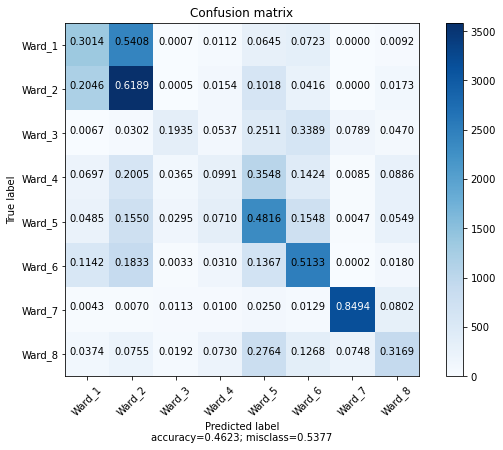

In [33]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[0], classes)

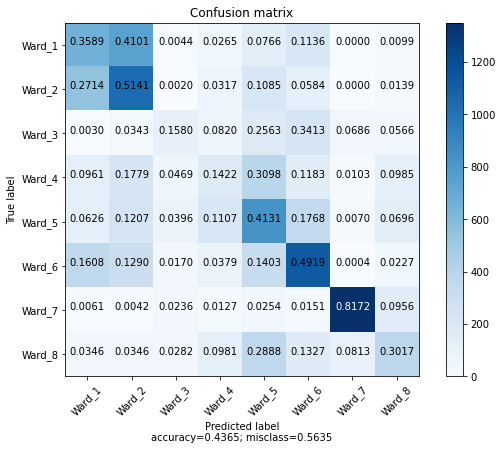

In [34]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[0], classes)

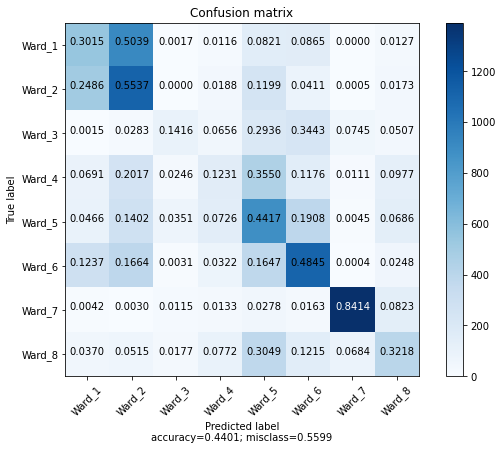

In [35]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[0], classes)

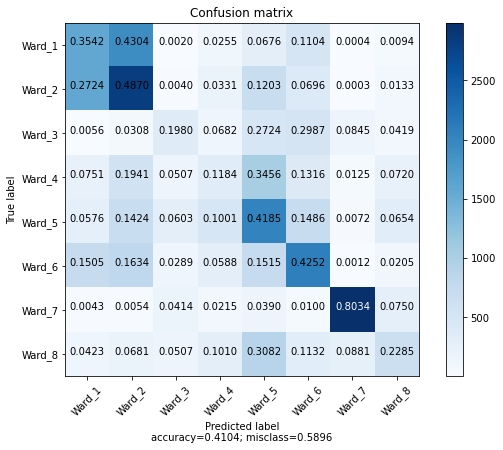

In [36]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[0], classes)

--------------------

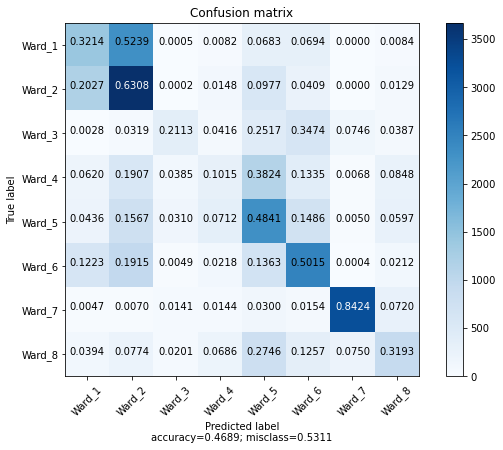

In [37]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[1], classes)

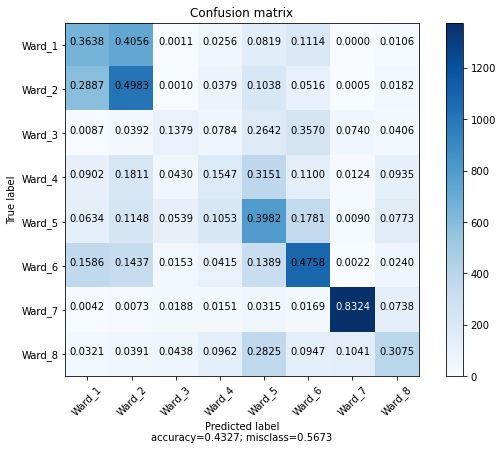

In [38]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[1], classes)

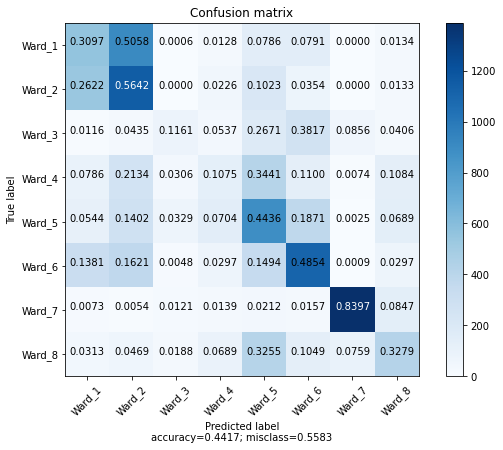

In [39]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[1], classes)

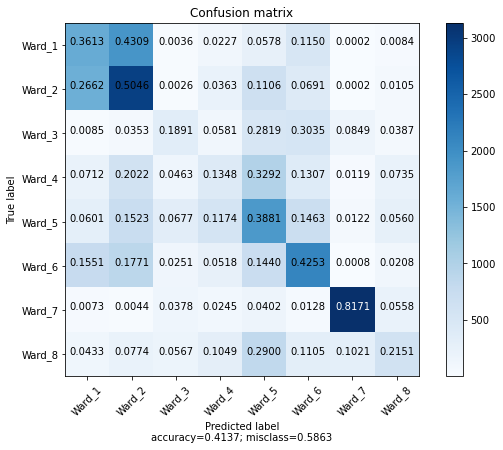

In [40]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[1], classes)

--------------------

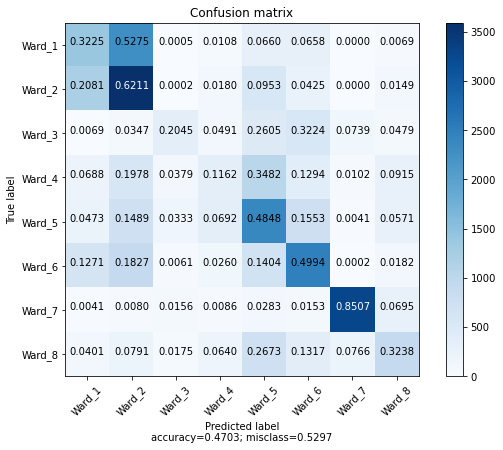

In [41]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[2], classes)

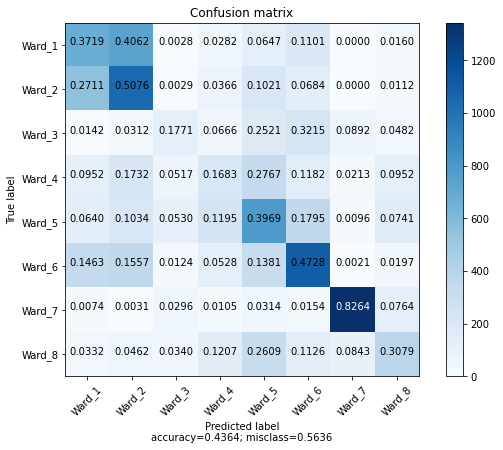

In [42]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[2], classes)

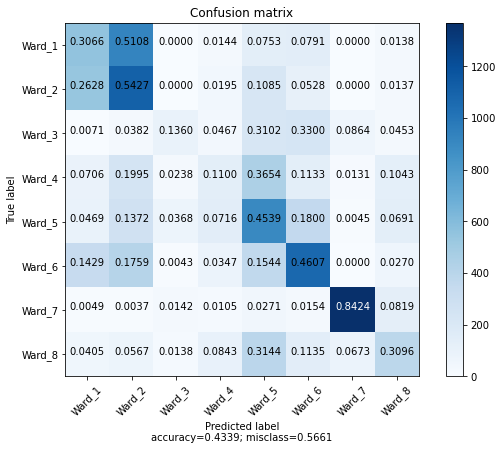

In [43]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[2], classes)

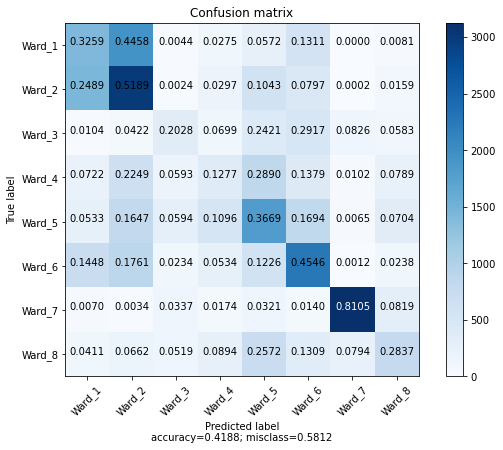

In [44]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[2], classes)

--------------------

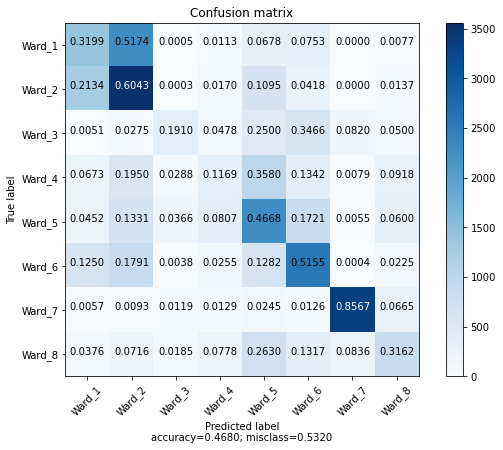

In [45]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[3], classes)

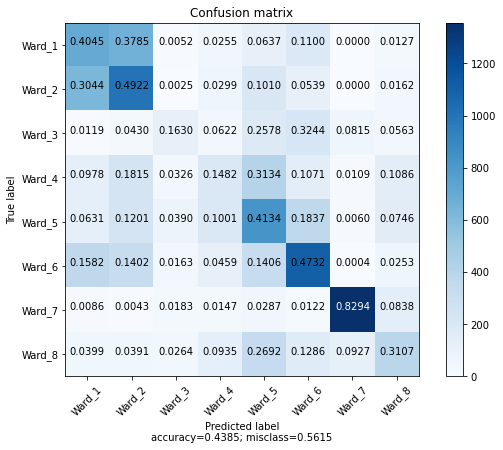

In [46]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[3], classes)

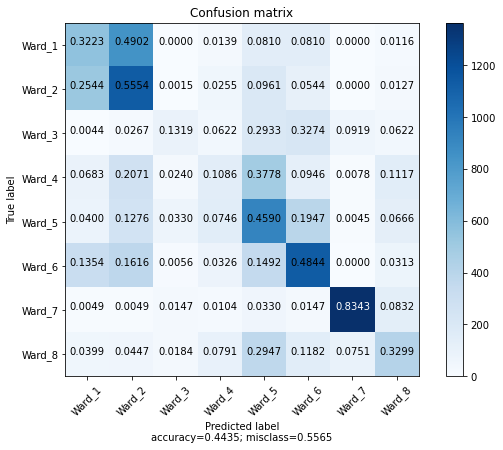

In [47]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[3], classes)

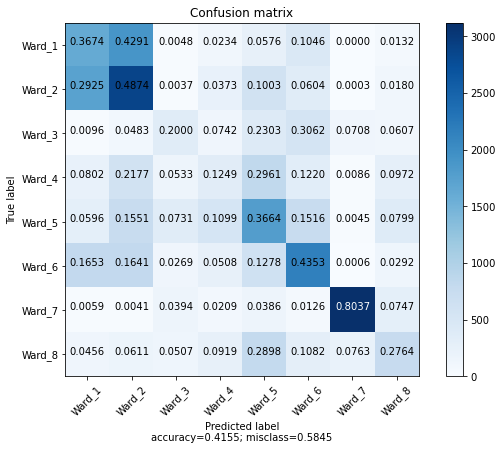

In [48]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[3], classes)

--------------------

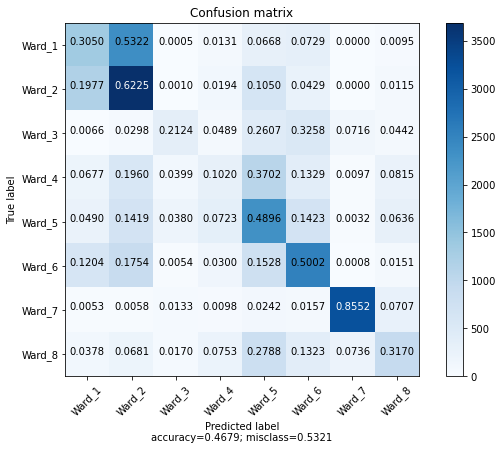

In [49]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[4], classes)

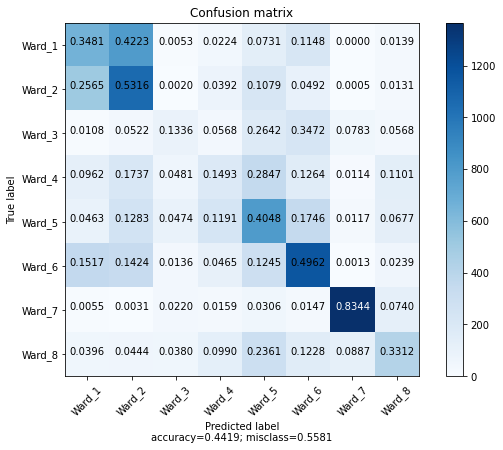

In [50]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[4], classes)

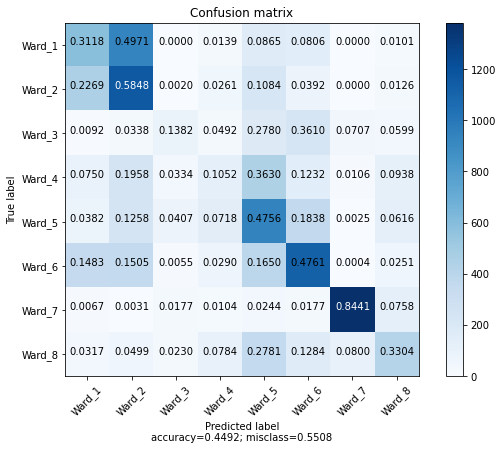

In [51]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[4], classes)

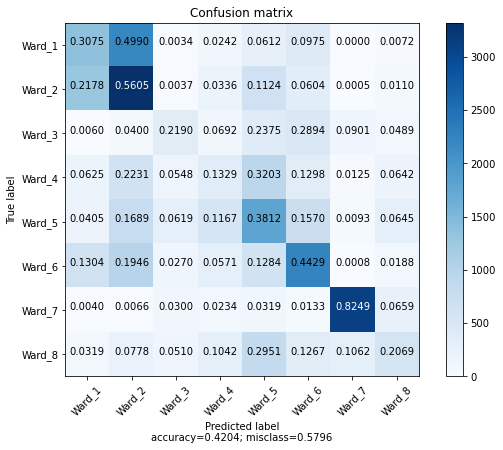

In [52]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[4], classes)